# Read files and extract information

There is an example of how to read files and extract information from them.

suppose you have some g16log files in a folder like this:

In [1]:
! ls -l ../../tests/test_files/g16log/

total 33748
-rw-r--r-- 1 tmj tmj  727184 Nov  4 20:14 11_Opt.log
-rw-r--r-- 1 tmj tmj   53139 Jan  9 20:53 3_Sp.log
-rw-r--r-- 1 tmj tmj 8008984 Feb 18 20:12 RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-Anion_From-IP_C-O-190_TS_Opt.log
-rw-r--r-- 1 tmj tmj 1424205 Nov  4 20:14 S_Ph_Ni_TS.log
-rw-r--r-- 1 tmj tmj 1910081 Jan 16 10:24 TS_4cGKps_ll_ad_4-18_6-13_optts_g16.log
-rw-r--r-- 1 tmj tmj   65746 Jan 16 10:28 TS_4cGKps_ll_ad_4-18_6-13_sp_g16.log
-rw-r--r-- 1 tmj tmj 3896697 Jan 15 22:37 TS_Zy0fwX_ll_ad_14-19_15-16_optts_g16.log
-rw-r--r-- 1 tmj tmj 1307536 Jan 16 10:28 TS_ts_guess_FaFxyx_template_4-18_6-13_optts_conf_g16.log
-rw-r--r-- 1 tmj tmj  165117 Feb 17 22:09 dsgdb9nsd_000001-3-.log
-rw-r--r-- 1 tmj tmj  823921 Jan 16 16:32 dsgdb9nsd_000107-3-.log
-rw-r--r-- 1 tmj tmj  703600 Jan 16 14:55 dsgdb9nsd_000180-9-.log
-rw-r--r-- 1 tmj tmj  385852 Jan 23 21:10 dsgdb9nsd_000484-1+.log
-rw-r--r-- 1 tmj tmj  509600 Jan 22 21:03 dsgdb9nsd_000672-3+.log
-rw-r--r-- 1 tmj tmj  583565 Jan 1

Looks like chaos? Yes, they are mixture from some different projects. MolOP can help you to read files and extract information from them through universal methods.

In [2]:
from molop import AutoParser
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole  # for better drawing

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400, 400

files = AutoParser("../../tests/test_files/g16log/*.log")

MolOP parsing with 16 jobs: 100%|██████████| 39/39 [00:03<00:00, 11.89it/s]
0 files failed to parse, 39 successfully parsed


We can first get the summary of the files. The summary contains the structure information(SMILES) and some key QM information of the files.

In [3]:
print(files.to_summary_df().to_markdown())

|    | parser       | file_name                                                                    | file_path                                                                                                                 | file_format   |   charge |   multiplicity | SMILES                                                                                                 | status                                                                                                                                                                                                   |        ZPE |        TCE |        TCH |        TCG |   ZPE-Gas |     E-Gas |     H-Gas |     G-Gas |         sp |     HOMO |     LUMO |     GAP |   first freq | first freq tag   |   second freq | second freq tag   |     S**2 |        S |
|---:|:-------------|:-----------------------------------------------------------------------------|:-------------------------------------------------------------------------------------

We concern about the TS in those log files.

In [4]:
TS_files = files.filter_TS()
print(TS_files.to_summary_df().to_markdown())

|    | parser       | file_name                                                                    | file_path                                                                                                                 | file_format   |   charge |   multiplicity | SMILES                                                                                                 | status                                                                                                                                                                                                   |      ZPE |      TCE |      TCH |      TCG |   ZPE-Gas |    E-Gas |    H-Gas |    G-Gas |       sp |     HOMO |     LUMO |     GAP |   first freq | first freq tag   |   second freq | second freq tag   |   S**2 |   S |
|---:|:-------------|:-----------------------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------

A case with not too many atoms

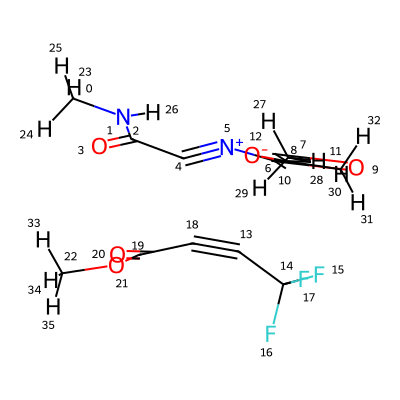

In [5]:
TS_files[2][-1].rdmol

We can get a structure copy with orientation standardized

This method depending on the input `idx_list`, `translate_anchor`, `rotate_anchor_to_X`, and `rotate_anchor_to_XY` are executed in order to obtain the normalized oriented molecule.

Sub-functions:

- `translate_anchor`: Translate the entire molecule so that the specified atom reaches the origin.
- `rotate_anchor_to_X`: Rotate the specified second atom along the axis passing through the origin so that it reaches the positive half-axis of the X-axis.
- `rotate_anchor_to_XY`: Rotate along the axis passing through the origin so that the specified third atom reaches quadrant 1 or 2 of the XY plane.

Input parameters:
                
- If the length of the input `idx_list` is 1, execute `translate_anchor`
- If the length of the input `idx_list` is 2, execute `translate_anchor` and `rotate_anchor_to_X`
- If the length of the input `idx_list` is 3, execute `translate_anchor`, `rotate_anchor_to_X` and `rotate_anchor_to_XY`
- If the length of the input `idx_list` is greater than 3, subsequent atomic numbers are not considered.

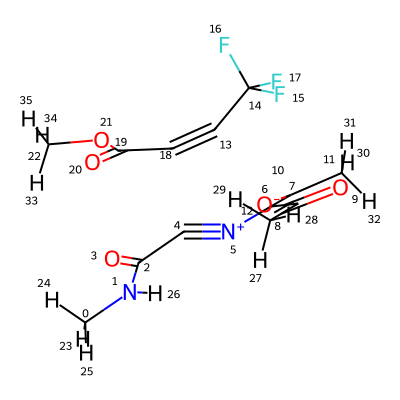

In [6]:
TS_files[2][-1].standard_orient([4, 5, 6]).rdmol

The numeric features (like totoal energy)

In [7]:
TS_files[2][-1].energy

-1287.35981 <Unit('hartree / particle')>

In [8]:
TS_files[2][-1].alpha_energy

{'gap': 0.15816 <Unit('hartree / particle')>,
 'homo': -0.25863 <Unit('hartree / particle')>,
 'lumo': -0.10047 <Unit('hartree / particle')>}

The unit can be transformed to other units powered by [pint](https://pint.readthedocs.io/en/stable/).

In [9]:
TS_files[2][-1].energy.to("kcal/mol")

-807830.4773030282 <Unit('kilocalorie / mole')>

The sequential features (like orbitals, freqs)

In [10]:
TS_files[2][-1].alpha_FMO_orbits[:10]

[-24.73197 <Unit('hartree / particle')>,
 -24.73103 <Unit('hartree / particle')>,
 -24.72836 <Unit('hartree / particle')>,
 -19.19597 <Unit('hartree / particle')>,
 -19.14519 <Unit('hartree / particle')>,
 -19.13671 <Unit('hartree / particle')>,
 -19.13657 <Unit('hartree / particle')>,
 -19.13465 <Unit('hartree / particle')>,
 -14.42477 <Unit('hartree / particle')>,
 -14.38013 <Unit('hartree / particle')>]

Also offer dimensionless features

In [11]:
TS_files[2][-1].dimensionless_alpha_energy

{'gap': 0.15816, 'homo': -0.25863, 'lumo': -0.10047}

The sequential dimensionless features are provided as generator

In [12]:
TS_files[2][-1].dimensionless_frequencies.__next__()

{'freq': -300.8307,
 'is imaginary': True,
 'reduced masses': 11.3735,
 'IR intensities': 63.598,
 'force constants': 0.6064,
 'normal coordinates': [(0.08, -0.0, -0.05),
  (0.08, -0.05, -0.04),
  (0.06, -0.14, -0.0),
  (0.03, -0.04, -0.0),
  (0.03, -0.49, -0.01),
  (-0.04, 0.16, 0.03),
  (-0.13, -0.27, 0.03),
  (-0.03, -0.08, 0.03),
  (0.0, 0.01, 0.02),
  (-0.04, -0.01, -0.02),
  (-0.03, -0.07, -0.01),
  (-0.02, -0.02, 0.01),
  (-0.0, 0.03, 0.0),
  (0.08, 0.37, -0.02),
  (-0.08, 0.07, 0.0),
  (-0.04, -0.01, 0.0),
  (-0.12, 0.08, 0.01),
  (-0.04, 0.0, 0.0),
  (0.01, 0.54, 0.02),
  (0.06, 0.01, -0.0),
  (0.05, -0.05, -0.01),
  (0.06, -0.03, 0.01),
  (0.05, -0.02, 0.01),
  (0.09, 0.01, -0.05),
  (0.06, 0.01, -0.04),
  (0.1, -0.0, -0.05),
  (0.05, -0.17, 0.01),
  (0.03, 0.03, -0.03),
  (0.01, 0.03, 0.01),
  (-0.02, 0.04, 0.06),
  (0.0, 0.01, 0.01),
  (0.0, -0.02, -0.0),
  (-0.06, -0.0, 0.05),
  (0.07, -0.02, 0.01),
  (0.05, -0.01, 0.0),
  (0.04, -0.02, -0.0)]}

MolOP can infer the pre- and post- TS structures from the TS structure with its unique imaginary frequency orientation.

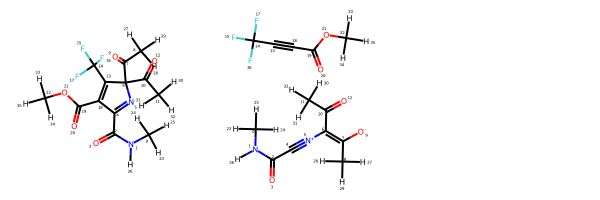

In [13]:
Draw.MolsToGridImage(TS_files[2][-1].possible_pre_post_ts())

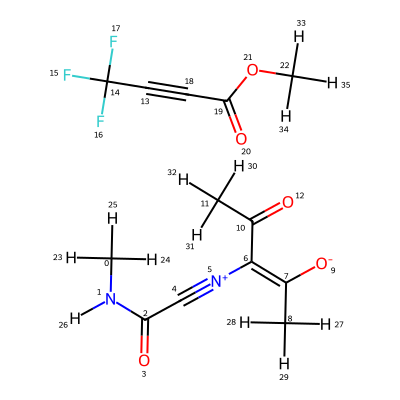

In [14]:
TS_files[2][-1].possible_pre_post_ts()[1]

In [15]:
TS_files[2][-1].imaginary_frequencies

[{'is imaginary': True,
  'freq': -300.8307 <Unit('reciprocal_centimeter')>,
  'reduced masses': 11.3735 <Unit('unified_atomic_mass_unit')>,
  'force constants': 0.6064 <Unit('millidyne / angstrom')>,
  'IR intensities': 63.598 <Unit('kilomole / mole')>,
  'normal coordinates': array([[ 0.08, -0.  , -0.05],
         [ 0.08, -0.05, -0.04],
         [ 0.06, -0.14, -0.  ],
         [ 0.03, -0.04, -0.  ],
         [ 0.03, -0.49, -0.01],
         [-0.04,  0.16,  0.03],
         [-0.13, -0.27,  0.03],
         [-0.03, -0.08,  0.03],
         [ 0.  ,  0.01,  0.02],
         [-0.04, -0.01, -0.02],
         [-0.03, -0.07, -0.01],
         [-0.02, -0.02,  0.01],
         [-0.  ,  0.03,  0.  ],
         [ 0.08,  0.37, -0.02],
         [-0.08,  0.07,  0.  ],
         [-0.04, -0.01,  0.  ],
         [-0.12,  0.08,  0.01],
         [-0.04,  0.  ,  0.  ],
         [ 0.01,  0.54,  0.02],
         [ 0.06,  0.01, -0.  ],
         [ 0.05, -0.05, -0.01],
         [ 0.06, -0.03,  0.01],
         [ 0.05, -0